In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dist_df = pd.read_csv('AK_distances.csv')
with open("AK.txt") as f:
    pop = f.read().splitlines()

pop_df = []
for p in pop[1:]:
    pop_df.append(p.split(' '))
pop_df = pd.DataFrame(pop_df, columns=["id", "pop"])

In [2]:
dist_df.head()

,Node_ID,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,0,0,353,297,163,586,635,230,999,490,...,596,1669,1605,1695,1478,474,615,938,820,1387
1,1,353,0,57,190,591,474,580,1244,836,...,523,1440,1403,1481,1300,345,697,949,898,1221
2,2,297,57,0,134,568,494,524,1197,779,...,511,1467,1425,1505,1317,337,665,931,870,1235
3,3,163,190,134,0,554,544,391,1100,647,...,529,1553,1500,1585,1382,375,623,920,832,1295
4,4,586,591,568,554,0,1061,724,807,779,...,130,1187,1093,1193,947,269,154,366,317,848


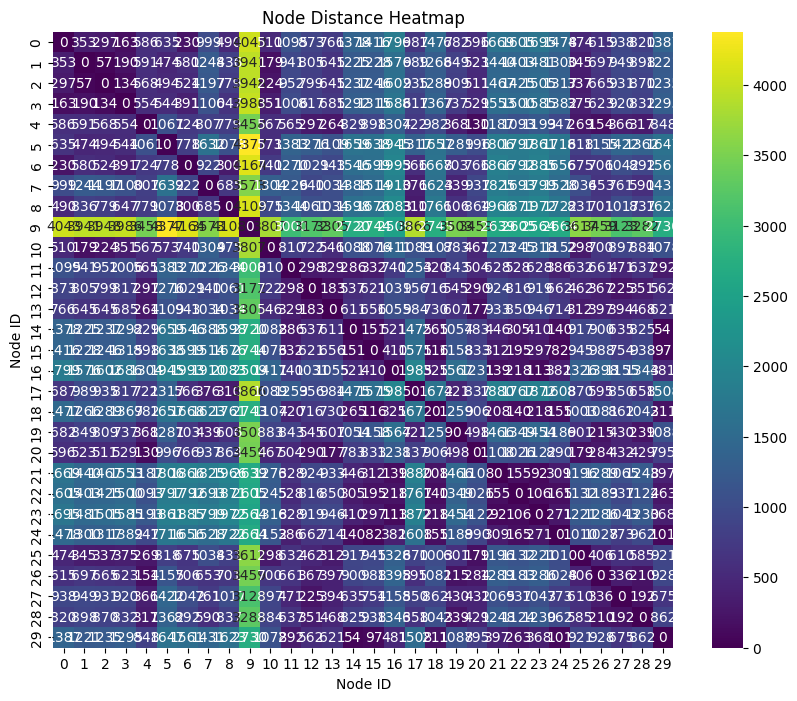

In [3]:
dist_df.set_index('Node_ID', inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(dist_df, cmap='viridis', annot=True, fmt=".0f")
plt.title('Node Distance Heatmap')
plt.xlabel('Node ID')
plt.ylabel('Node ID')
plt.show()

In [4]:
pop_df

,id,pop
0,0,18666
1,1,1476
2,2,844
3,3,4857
4,4,107081
5,5,3420
6,6,8368
7,7,11031
8,8,10046
9,9,5232


In [5]:
feature_df = pd.read_csv('AK_features.csv', header=None)
feature_df

,0,1,2
0,2050,18666,"02290,02170,02122,02158,02070,02164"
1,2164,1476,"02013,02060,02150,02122,02070,02050"
2,2060,844,"02070,02164"
3,2070,4857,"02060,02164,02050"
4,2170,107081,"02068,02290,02240,02063,02066,02020,02122,02050"
5,2013,3420,"02016,02164"
6,2158,8368,"02290,02180,02050"
7,2185,11031,"02290,02188"
8,2180,10046,"02290,02158,02188"
9,2016,5232,02013


In [6]:
import numpy as np
zero_matrix = np.zeros((len(feature_df), len(feature_df)))
adj_df = pd.DataFrame(zero_matrix)
id_map = {}
for i, id in enumerate(feature_df[0]):
    id_map[id] = i
id_map

{2050: 0,
 2164: 1,
 2060: 2,
 2070: 3,
 2170: 4,
 2013: 5,
 2158: 6,
 2185: 7,
 2180: 8,
 2016: 9,
 2150: 10,
 2282: 11,
 2066: 12,
 2063: 13,
 2230: 14,
 2105: 15,
 2130: 16,
 2188: 17,
 2220: 18,
 2290: 19,
 2020: 20,
 2198: 21,
 2195: 22,
 2275: 23,
 2110: 24,
 2122: 25,
 2068: 26,
 2240: 27,
 2090: 28,
 2100: 29}

In [7]:
for node, adj_list in zip(feature_df[0], feature_df[2]):
    node_idx = id_map[node]
    for adj in adj_list.split(','):
        adj_idx = id_map[int(adj[1:])]
        adj_df.iloc[node_idx, adj_idx] = 1
adj_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


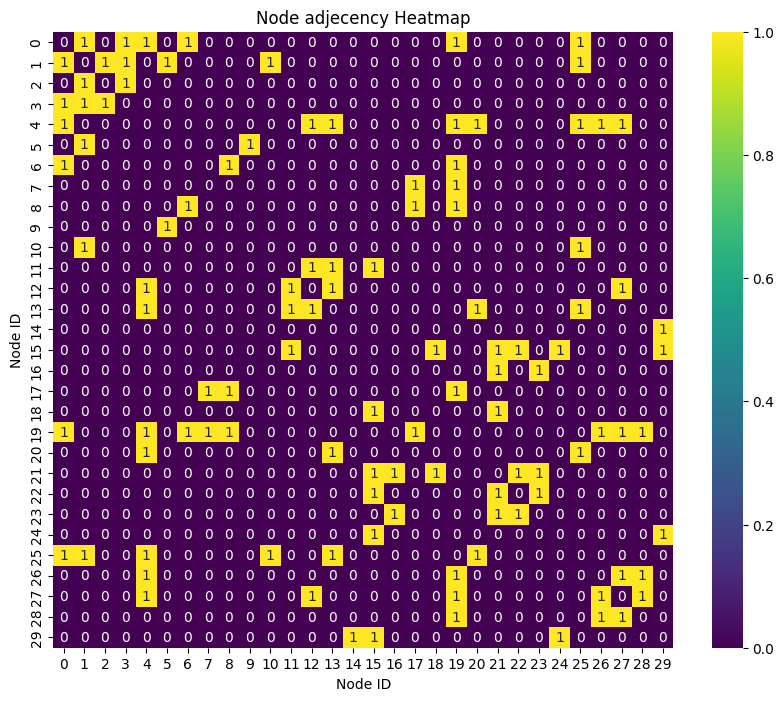

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(adj_df, cmap='viridis', annot=True, fmt=".0f")
plt.title('Node adjecency Heatmap')
plt.xlabel('Node ID')
plt.ylabel('Node ID')
plt.show()

$$ \min \sum_{i=1}^{n} \sum_{j=1}^{n} \sum_{k=1}^{K} x_{i,k} \cdot x_{j,k} \cdot \text{dist}(i, j)$$

$$ \sum_{k=1}^{K} x_{i,k} = 1, \forall i \in \{1, \ldots, n\}$$

In [10]:
from gurobipy import Model, GRB

model = Model("intra_clustering_distance_model")

n = len(dist_df)
K = 5
x = model.addVars(n, K, vtype=GRB.BINARY, name="x")

model.setObjective(sum(x[i, k] * x[j, k] * dist_df.iloc[i][j] for i in range(n) for j in range(n) for k in range(K)), GRB.MINIMIZE)

model.addConstrs((sum(x[i, k] for k in range(K)) == 1 for i in range(n)), "OneCluster")

model.optimize()

for v in model.getVars():
    # if v.x > 0.5: 
    print(f"{v.varName}: {v.x}")


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 30 rows, 150 columns and 150 nonzeros
Model fingerprint: 0xffeaef68
Model has 2175 quadratic objective terms
Variable types: 0 continuous, 150 integer (150 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+02, 2e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 918920.00000
Presolve time: 0.07s
Presolved: 2205 rows, 2325 columns, 6675 nonzeros
Variable types: 0 continuous, 2325 integer (2325 binary)

Root relaxation: objective 0.000000e+00, 60 iterations, 0.03 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf |

In [11]:
import re
cluster_assignments = []
re_pattern = r'\[(\d+(?:,\s*\d+)*)\]'
for v in m.getVars():
    if v.varName.startswith('x') and v.x > 0.5: 
        i,j = re.search(re_pattern, v.varName).group(1).split(",")
        cluster_assignments.append(int(j))

print(cluster_assignments)

NameError: name 'm' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


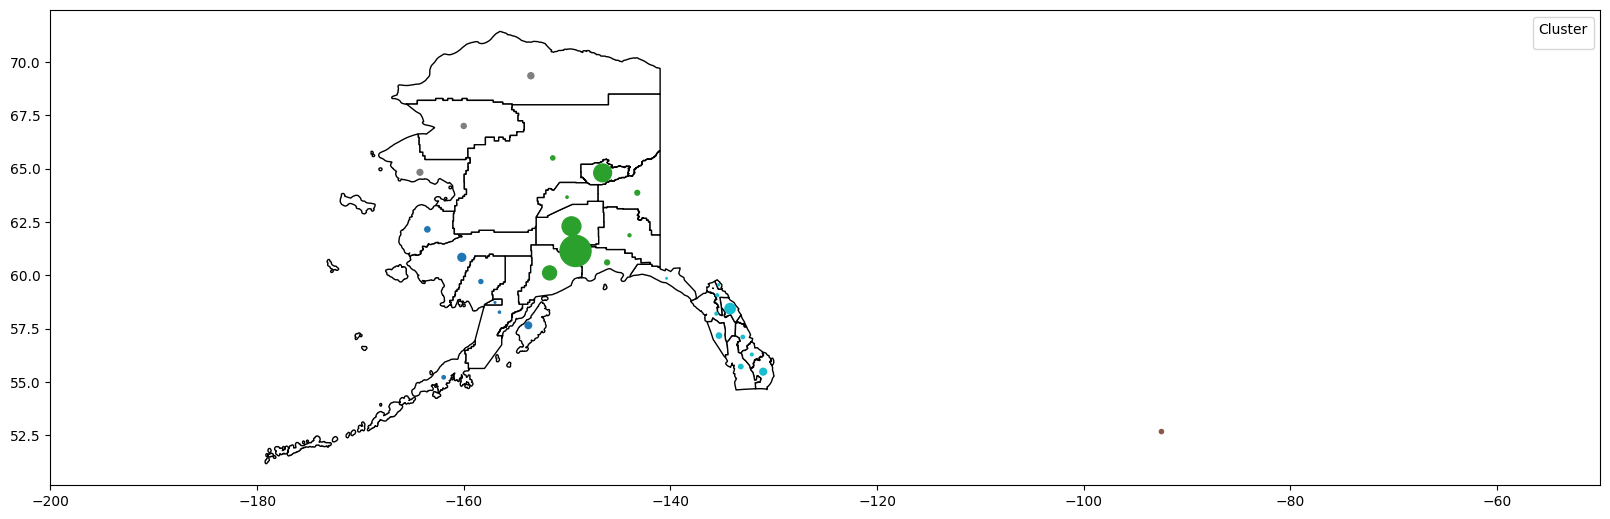

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

path_to_counties_shapefile = 'AK_geo_files/AK_counties'
path_to_centers_shapefile = 'AK_geo_files/AK_centers'

gdf_counties = gpd.read_file(f"{path_to_counties_shapefile}.shp")
gdf_centers = gpd.read_file(f"{path_to_centers_shapefile}.shp")

# cluster_assignments = [0, 0, 0, 0, 4, 0, 2, 2, 2, 3, 0, 3, 4, 4, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 1, 0, 4, 4, 4, 1]

gdf_centers['cluster'] = cluster_assignments
# gdf_centers = gdf_centers.merge(pop_df, left_on='id', right_on='id')
gdf_centers = pd.concat([gdf_centers, pop_df], axis=1, join='inner')
gdf_centers['markersize'] = gdf_centers['pop'].astype(int) / gdf_centers['pop'].astype(int).max() * 500 

fig, ax = plt.subplots(figsize=(20, 30))
gdf_counties.plot(ax=ax, color='white', edgecolor='black')
gdf_centers.plot(ax=ax, column='cluster', categorical=True, legend=True, markersize=gdf_centers['markersize'])

# Optional: Add legend title
ax.legend(title='Cluster')
ax.set_xlim(-200,-50)

plt.show()

\begin{align}
& \text{Distance objective:} &&\min \sum_{i=1}^{n} \sum_{j=1}^{n} \sum_{k=1}^{K} x_{i,k} \cdot x_{j,k} \cdot \text{dist}(i, j)\\
& \text{One cluster constraint:} &&\sum_{k=1}^{K} x_{i,k} = 1, \forall i \in \{1, \ldots, n\}\\
& \text{Population objective:} &&\min \sum_{k=1}^{K} (P_k - P_{AVG}) \\ 
& \text{New variables, } d_{k}^{+}, d_{k}^{-} \text{, representing the} \pm \text{deviation from the mean per cluster.}\\
& \text{Deviation objective:} &&\min \sum_{k=1}^{K} (d_{k}^{+} + d_{k}^{-})\\
& \text{Deviation constraint:} && P_{k} - P_{AVG} = d_{k}^{+} - d_{k}^{-}, \text{where: } d_{k}^{+}, d_{k}^{-} \geq 0 \hspace{.2cm} \forall_k
\end{align}

In [ ]:
from gurobipy import Model, GRB
import numpy as np

K = 5    # Number of clusters
n = len(dist_df)
P_avg = sum(pop_df["pop"].astype(int)) / K  # Average population per cluster

model = Model("intra_clustering_distance_model")

x = model.addVars(n, K, vtype=GRB.BINARY, name="x")

# Dist contraint
model.addConstrs((sum(x[i, k] for k in range(K)) == 1 for i in range(n)), "OneCluster")

# Population variance constraints
d_plus = model.addVars(K, name="d_plus")
d_minus = model.addVars(K, name="d_minus")

P = model.addVars(K, name="P")
for k in range(K):
    model.addConstr(P[k] == sum(x[i, k] * pop_df["pop"].astype(int).iloc[i] for i in range(n)), name=f"population_{k}")

# Add constraints for d_plus and d_minus to capture the deviations from the average population
for k in range(K):
    model.addConstr(P[k] - P_avg <= d_plus[k] - d_minus[k], name=f"deviation_pos_{k}")
    model.addConstr(P_avg - P[k] <= d_plus[k] - d_minus[k], name=f"deviation_neg_{k}")

# Objectives
dist_obj =  sum(x[i, k] * x[j, k] * dist_df.iloc[i][j] for i in range(n) for j in range(n) for k in range(K))
pop_obj = sum(d_plus[k] + d_minus[k] for k in range(K))

alpha = 1
beta = 1
model.setObjective(alpha * dist_obj + beta * pop_obj, GRB.MINIMIZE)

model.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 45 rows, 165 columns and 335 nonzeros
Model fingerprint: 0xd9acde71
Model has 2320 quadratic objective terms
Variable types: 15 continuous, 150 integer (150 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+00]
  QObjective range [2e+00, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 0 rows and 5 columns
Presolve time: 0.04s
Presolved: 2220 rows, 2335 columns, 6850 nonzeros
Variable types: 0 continuous, 2335 integer (2325 binary)
Found heuristic solution: objective 2066500.6000
Found heuristic solution: objective 2012827.6000
Found heuristic solution: objective 550681.20000

Root relaxation: objective 2.478200e+04, 141 iterations, 0.

In [ ]:
if model.status == GRB.OPTIMAL or model.status == GRB.SUBOPTIMAL:
    # Output the results
    for v in model.getVars():
        print(f"{v.varName}: {v.x}")
else:
    print("No feasible solution found.")

x[0,0]: 1.0
x[0,1]: 0.0
x[0,2]: 0.0
x[0,3]: 0.0
x[0,4]: 0.0
x[1,0]: 1.0
x[1,1]: 0.0
x[1,2]: 0.0
x[1,3]: 0.0
x[1,4]: 0.0
x[2,0]: 1.0
x[2,1]: 0.0
x[2,2]: 0.0
x[2,3]: 0.0
x[2,4]: 0.0
x[3,0]: 1.0
x[3,1]: 0.0
x[3,2]: 0.0
x[3,3]: 0.0
x[3,4]: 0.0
x[4,0]: 1.0
x[4,1]: 0.0
x[4,2]: 0.0
x[4,3]: 0.0
x[4,4]: 0.0
x[5,0]: 1.0
x[5,1]: 0.0
x[5,2]: 0.0
x[5,3]: 0.0
x[5,4]: 0.0
x[6,0]: 1.0
x[6,1]: 0.0
x[6,2]: 0.0
x[6,3]: 0.0
x[6,4]: 0.0
x[7,0]: 0.0
x[7,1]: 0.0
x[7,2]: 0.0
x[7,3]: 1.0
x[7,4]: 0.0
x[8,0]: 0.0
x[8,1]: 0.0
x[8,2]: 0.0
x[8,3]: 1.0
x[8,4]: 0.0
x[9,0]: 0.0
x[9,1]: 0.0
x[9,2]: 0.0
x[9,3]: 1.0
x[9,4]: 0.0
x[10,0]: 0.0
x[10,1]: 0.0
x[10,2]: 0.0
x[10,3]: 1.0
x[10,4]: 0.0
x[11,0]: 0.0
x[11,1]: 0.0
x[11,2]: 1.0
x[11,3]: 0.0
x[11,4]: 0.0
x[12,0]: 0.0
x[12,1]: 1.0
x[12,2]: 0.0
x[12,3]: 0.0
x[12,4]: 0.0
x[13,0]: 0.0
x[13,1]: 1.0
x[13,2]: 0.0
x[13,3]: 0.0
x[13,4]: 0.0
x[14,0]: 0.0
x[14,1]: 0.0
x[14,2]: 1.0
x[14,3]: 0.0
x[14,4]: 0.0
x[15,0]: 0.0
x[15,1]: 0.0
x[15,2]: 0.0
x[15,3]: 0.0
x[15,4]: 1.0
x[16,0]: 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


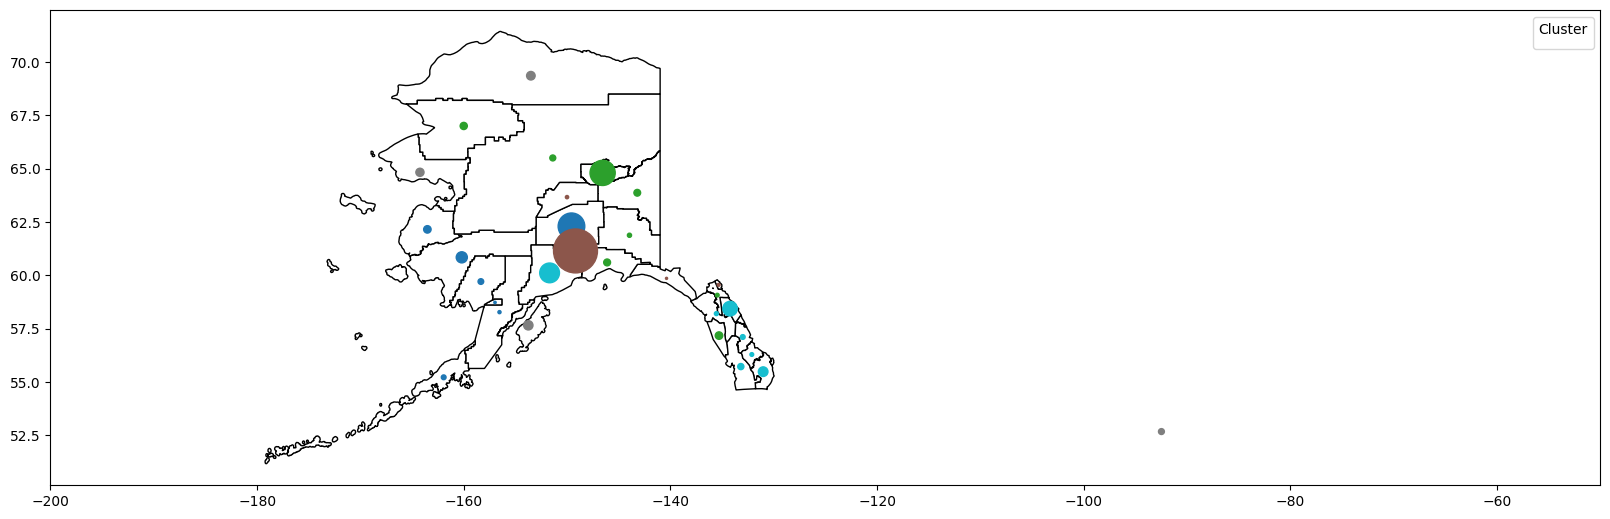

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

import re
cluster_assignments = []
re_pattern = r'\[(\d+(?:,\s*\d+)*)\]'
for v in model.getVars():
    if v.varName.startswith('x') and v.x > 0.5: 
        i,j = re.search(re_pattern, v.varName).group(1).split(",")
        cluster_assignments.append(int(j))

path_to_counties_shapefile = 'AK_geo_files/AK_counties'
path_to_centers_shapefile = 'AK_geo_files/AK_centers'

gdf_counties = gpd.read_file(f"{path_to_counties_shapefile}.shp")
gdf_centers = gpd.read_file(f"{path_to_centers_shapefile}.shp")

# cluster_assignments = [0, 0, 0, 0, 4, 0, 2, 2, 2, 3, 0, 3, 4, 4, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 1, 0, 4, 4, 4, 1]

gdf_centers['cluster'] = cluster_assignments
# gdf_centers = gdf_centers.merge(pop_df, left_on='id', right_on='id')
gdf_centers = pd.concat([gdf_centers, pop_df], axis=1, join='inner')
gdf_centers['markersize'] = gdf_centers['pop'].astype(int) / gdf_centers['pop'].astype(int).max() * 1000

fig, ax = plt.subplots(figsize=(20, 30))
gdf_counties.plot(ax=ax, color='white', edgecolor='black')
gdf_centers.plot(ax=ax, column='cluster', categorical=True, legend=True, markersize=gdf_centers['markersize'])

# Optional: Add legend title
ax.legend(title='Cluster')
ax.set_xlim(-200,-50)

plt.show()